In [74]:
# --------------------------------------------------------------------------

# ----------------- ridge regression test for chemometrica 2019 journal paper

# -------------------------------------------------------------------------


# ¡¡¡ --- !!! # ---> modules and data cases

# --- system modules

import sys
import datetime
import os

#base_dir = "C:/Users/u0106869/Google Drive/kul_phd/conferences/chemometrica-2019/paper/chemometrica2019_conference_paper_codes_submission02"
base_dir = "/home/valeria/vfonsecad/kul_phd/conferences/chemometrica-2019/paper/chemometrica2019_conference_paper_codes_submission02"


# --- data handling modules

import numpy as np
import pandas as pd
import scipy.io as sp_io

# --- visualization modules

import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import seaborn as sns
import imageio
from matplotlib.cm import ScalarMappable
from matplotlib import rcParams
import matplotlib as mtply


# --- my modules

methods_dir = base_dir + '/methods/python'  
sys.path.insert(0, methods_dir + '/model_building')
sys.path.insert(0, methods_dir + '/read_data')
from class_chemometrics_data import chemometrics_data
from class_weighted_mcesimpls import weighted_mcesimpls, weighted_mcesimpls_sklearn




# ¡¡¡ --- !!! # ---> base working directory and available data cases


# ************************************ init --- user 
cases_dict = {"d0001": ["d0001_corn", "corn_data_prepared"],
              "d0005": ["d0005_milkrobot_visnir2010", "trans_lactose_randval_data_prepared"],
              "d0013": ["d0013_octane", "octane_data_prepared"]}
# ************************************ end --- user 


print("--------- imports loaded ----------")




# ¡¡¡ --- !!! # ---> data


# ************************************ init --- user 
caseID_key = "d0005"
# ************************************ end --- user 

case_dir = cases_dict[caseID_key][0]
dname = cases_dict[caseID_key][1]
data_dir = '/data/' + case_dir + '/data_prepared/'
output_dir = base_dir + '/output/'





# ************************************ init --- user
data_class = chemometrics_data(base_dir + data_dir + dname + '.mat', 
                               data_identifier = data_dir + dname,
                               include_val = True,
                               include_test = False,
                               include_unlabeled = False,
                               y_all_range = False, 
                               y_range = np.array([2]))
# ************************************ end --- user





print("--------- data loaded for " + data_class.data_identifier + "----------")






--------- imports loaded ----------
--------- data loaded for /data/d0005_milkrobot_visnir2010/data_prepared/trans_lactose_randval_data_prepared!*Lactose*!----------


In [75]:
# ¡¡¡ --- !!! # ---> ridge regression function


from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import cross_val_predict, KFold, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt


class ridge_regression(BaseEstimator, RegressorMixin):

    def __init__(self, reg_lambda = 0.1):
        
        self.reg_lambda = reg_lambda
        
    
    def fit(self, xx, yy):    


        reg_lambda = self.reg_lambda
        Xc = xx - xx.mean(axis=0)
        ncal = Xc.shape[0] 
        K = Xc.shape[1]  
        Xreg = np.concatenate((np.ones((ncal,1)),Xc), axis = 1)
        #wtemp = np.linalg.solve(Xreg.T.dot(Xreg) + reg_lambda*np.eye(K+1), Xreg.T.dot(yy))
        wtemp = np.linalg.inv(Xreg.T.dot(Xreg) + reg_lambda*np.eye(K+1)).dot(Xreg.T.dot(yy))
        
        self.B = wtemp
        self.x_mean = xx.mean(axis=0)
    
  
    def predict(self, X):
        
        Xval_c = X - self.x_mean
        nval = Xval_c.shape[0]
        Xval_reg = np.concatenate((np.ones((nval,1)),Xval_c), axis = 1)
        Ypred = Xval_reg.dot(self.B)
            
        return Ypred

def rr_crossval_KFold(xx, yy, trainObject, number_splits=10):
    

    cvObject = KFold(n_splits=number_splits)
    cv_predicted = cross_val_predict(trainObject, xx, yy, cv=cvObject)       

    return cv_predicted


In [76]:

# ¡¡¡ --- !!! # ---> results of tuning for all models

tuning_results = {}
print("ready")

ready


In [77]:
# ¡¡¡ --- !!! # ---> tuning for RR

#cont = input("Start?   ")
print("\n start time:---", datetime.datetime.now(), "\n")


# ************************************ init --- user 

lambda_min = 0.0000001
lambda_max = 0.01
total_lambdas = 30
kfold_splits = 10
# ************************************ end --- user 





lambda_range = np.linspace(lambda_min, lambda_max, total_lambdas)
cv_error_matrix = np.zeros((1,lambda_range.shape[0]))
val_error_matrix = np.zeros((1,lambda_range.shape[0]))


ssi = 0

for lambda_i in lambda_range:
    
   
    # --- model object
    rr_object = ridge_regression(lambda_i)
    
    
    
    
        # --- training model

    try:
        
        rr_object.fit(data_class.get_cal()["xcal"],data_class.get_cal()["ycal"])
        yval_pred = rr_object.predict(data_class.get_val()["xval"])
        
        ycal_cv_pred = rr_crossval_KFold(data_class.get_cal()["xcal"],data_class.get_cal()["ycal"], rr_object)
        cv_error = np.sqrt(np.power(data_class.get_cal()["ycal"] - ycal_cv_pred,2).mean())
        val_error = np.sqrt(np.power(data_class.get_val()["yval"] - yval_pred,2).mean())
        
    except np.linalg.LinAlgError:
        
        cv_error = None
        val_error = None
           



        # --- Store error 


       
    cv_error_matrix[0,ssi] = cv_error
    val_error_matrix[0,ssi] = val_error

    ssi += 1
    print(ssi)
        
    
tuning_results["rr"] = {"cv_error": cv_error_matrix,
                        "val_error": val_error_matrix,                       
                                "lambda_range": lambda_range
                                }




print("\n finish time:---", datetime.datetime.now())


 start time:--- 2019-12-09 15:03:21.097027 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30

 finish time:--- 2019-12-09 15:03:44.515673


[1.00000000e-07 3.44924138e-04 6.89748276e-04 1.03457241e-03
 1.37939655e-03 1.72422069e-03 2.06904483e-03 2.41386897e-03
 2.75869310e-03 3.10351724e-03 3.44834138e-03 3.79316552e-03
 4.13798966e-03 4.48281379e-03 4.82763793e-03 5.17246207e-03
 5.51728621e-03 5.86211034e-03 6.20693448e-03 6.55175862e-03
 6.89658276e-03 7.24140690e-03 7.58623103e-03 7.93105517e-03
 8.27587931e-03 8.62070345e-03 8.96552759e-03 9.31035172e-03
 9.65517586e-03 1.00000000e-02]


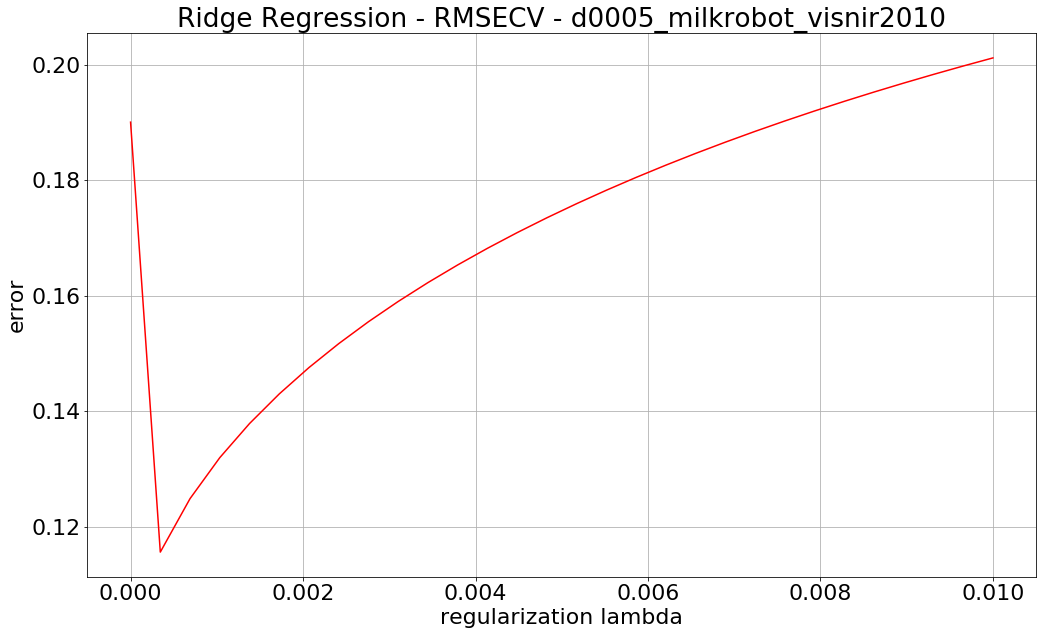

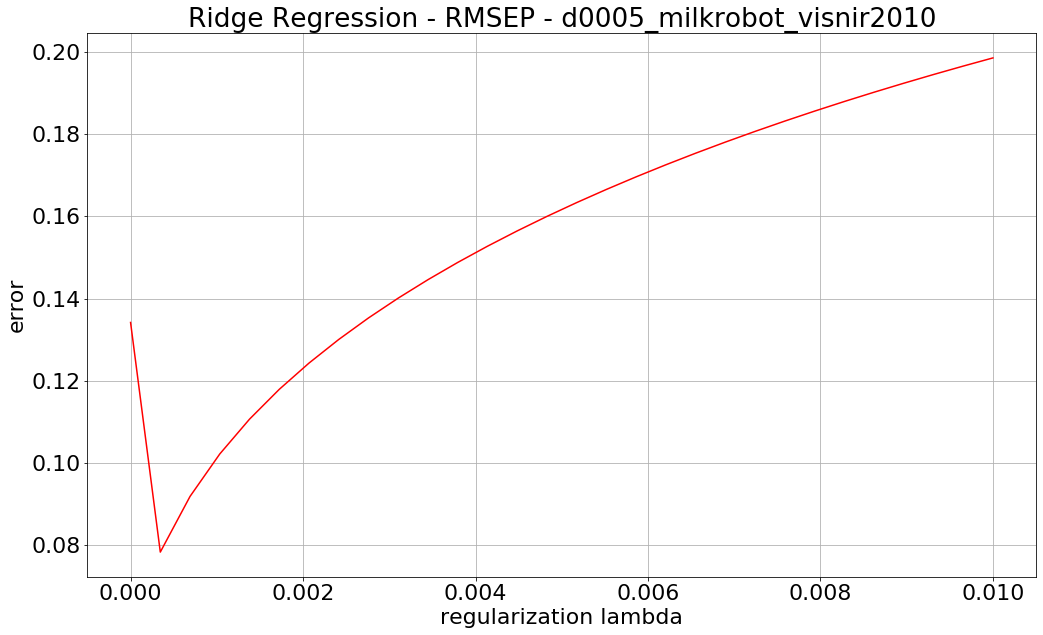

In [78]:
# ¡¡¡ --- !!! # ---> plots of cv RR

print(tuning_results["rr"]["lambda_range"])

plt.rcParams.update({'font.size': 22}) 


    # --- colormap 
    

    # --- plot

fig, ax = plt.subplots(figsize = (17,10), facecolor="white")

plt.plot(lambda_range, tuning_results["rr"]["cv_error"][0,:], c = "red")
plt.title("Ridge Regression - RMSECV - " + cases_dict[caseID_key][0])
plt.xlabel("regularization lambda")
plt.ylabel("error")
plt.grid()
#plt.show()
plt.savefig(output_dir + 'figures/fig_' + case_dir + '00_rmsecv_ridge_regression.png', format='png',bbox_inches = 'tight')


fig, ax = plt.subplots(figsize = (17,10), facecolor="white")

plt.plot(lambda_range, tuning_results["rr"]["val_error"][0,:], c = "red")
plt.title("Ridge Regression - RMSEP - " + cases_dict[caseID_key][0])
plt.xlabel("regularization lambda")
plt.ylabel("error")
plt.grid()
plt.show()


In [79]:
# ¡¡¡ --- !!! # ---> check min RMSECV

selected_lambda = lambda_range[np.argmin(tuning_results["rr"]["cv_error"][0,:])]
selected_lambda

0.0003449241379310345

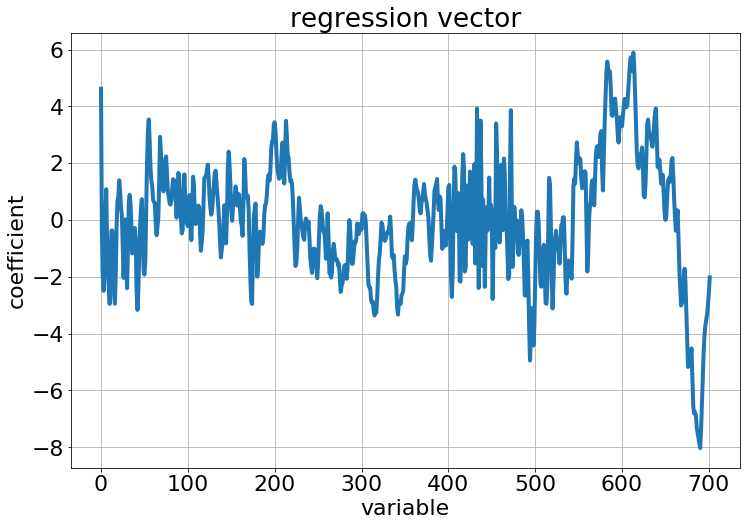

In [80]:
# ¡¡¡ --- !!! # ---> selected model


rr_object = ridge_regression(selected_lambda)    
rr_object.fit(data_class.get_cal()["xcal"],data_class.get_cal()["ycal"])




# --- regression vector


fig, ax = plt.subplots(figsize = (12,8), facecolor="white")
plt.plot(rr_object.B, linewidth = 4)
plt.title("regression vector")
plt.xlabel("variable")
plt.ylabel("coefficient")
plt.grid()
plt.show()
